# Laboratório - Aproximador de funções

## Integrantes
| Nomes                             | R.A          |
|-----------------------------------|--------------|
| Andy Silva Barbosa                | 22.218.025-9 |
| Rafael Zacarias Palierini         | 22.218.030-9 |
| Rubens de Araujo Rodrigues Mendes | 22.218.009-3 |
| Vitor Acosta da Rosa              | 22.218.006-9 |

 ## Objetivos
+ [ ] Montar aproximadores de funções para os arquivos de teste de 2 a 5.
+ [ ] Simular 10 vezes cada arquitetura:
 + [ ] Apresentar média e desvio padrão ao término.
 + [ ] Três simulações de arquitetura (Camadas e quantidade de neurônios).

+ [ ] Apresentar o melhor resultado das três simulações.
+ [ ] Colocar no gitHub.
 

# Imports das libs utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as sm 

Inicialmente, faremos a função que irá comportar o modelo de *Multi-layer Perceptron*.

In [2]:
"""
Função que cria o modelo e o retorna
"""

def MLPModel(hidden_layer_tuple, num_iter, act_func):
  model = MLPRegressor(hidden_layer_sizes=tuple(hidden_layer_tuple),
                       activation = act_func,
                       max_iter = num_iter,
                       solver="adam",
                       learning_rate="adaptive",
                       n_iter_no_change = 1000
                      )
  
  return model

# Base California Housing - Exemplo Real

Abaixo realizaremos a leitura da base california_housing, utilizando seus sets de treino e teste.


In [3]:
#Leitura do set de treino
train_data = pd.read_csv('Bases_ATP/california_housing_train.csv', header = (0))
print("Números de linhas e colunas - Treino: ", train_data.shape)
#train_data.head(25)

#Leitura do set de teste 
test_data = pd.read_csv('Bases_ATP/california_housing_test.csv', header = (0))
print("Números de linhas e colunas - Teste: ", test_data.shape)
#test_data.head(25)

Números de linhas e colunas - Treino:  (17000, 9)
Números de linhas e colunas - Teste:  (3000, 9)


# Escolha de X e Y 

Aqui, realizaremos a separação das características da base e o valor alvo, no caso o nosso valor alvo é o **preço médio da casa**.

In [5]:
#Escolha de X e Y para treino
X_Train = train_data.iloc[:, 0:8]
Y_Train = train_data["median_house_value"]

# X_Train.head(25)

#Escolha de X e Y para treino
X_Test = test_data.iloc[:, 0:8]
Y_Test = test_data["median_house_value"]

Y_Test.head(50)

0     344700.0
1     176500.0
2     270500.0
3     330000.0
4      81700.0
5      67000.0
6      67000.0
7     166900.0
8     194400.0
9     164200.0
10    125000.0
11     58300.0
12    252600.0
13    231200.0
14    222500.0
15    153100.0
16    181300.0
17    137500.0
18    300000.0
19    414300.0
20    126300.0
21     83400.0
22    241500.0
23    115400.0
24    150700.0
25    484700.0
26    250000.0
27    369200.0
28    350000.0
29    425000.0
30    105600.0
31    172600.0
32    128900.0
33    141800.0
34    183800.0
35    178700.0
36    270800.0
37    185300.0
38    141500.0
39    232200.0
40     83300.0
41    275000.0
42    500001.0
43     79300.0
44    214800.0
45    237500.0
46    212500.0
47    105700.0
48    123800.0
49    173900.0
Name: median_house_value, dtype: float64

Agora, iremos realizar o processo de aproximação das funções utilizando o modelo MLP 

In [ ]:
model = MLPModel((64,128,64),1000,"relu")

model = model.fit(X_Train, Y_Train)

Avaliação Por R2 Score - Coeficiente de determinação. Expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Quanto mais próximo de 1, mais ajustável a amosta ele é.


In [18]:
pred = model.predict(X_Test)

print("R2 score =", round(sm.r2_score(Y_Test, pred), 2))

R2 score = 0.67


# Início do trabalho

A partir daqui, serão utilizados os arquivos .npy disponibilizados em aula.


In [8]:
#Função para cálculos de perda
def calcLoss(x, y, listLayers):
  loss, losses = [], []
  for layer in listLayers:
    loss = []
    for i in range(10):
      model = MLPModel(layer , 10000 , "relu")
      model_regr = model.fit(x,y)
      y_pred = model_regr.predict(x)
      loss.append(model_regr.loss_)
    losses.append(loss)
  return losses

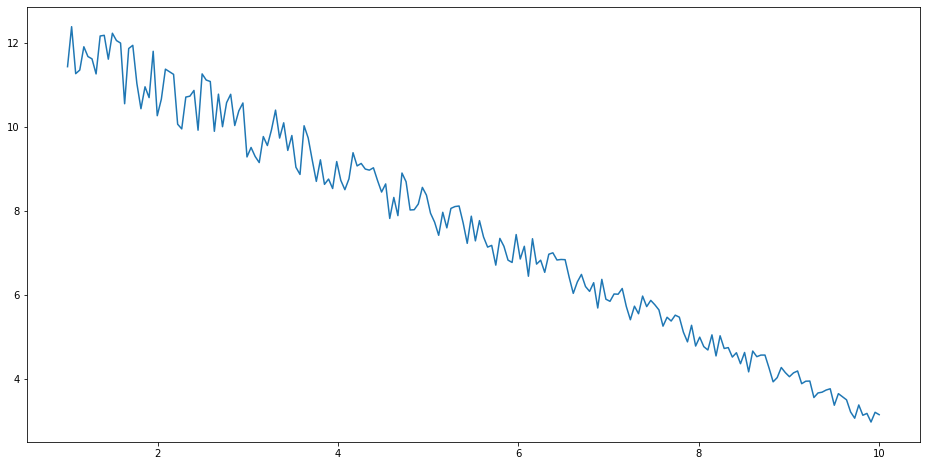

In [10]:
# Leitura do arquivo "teste2"
arch_02 = np.load("Bases_ATP/teste2.npy")

# Salvamento das variáveis
x_02 = arch_02[0]
y_02 = arch_02[1]

# Exibição do comportamento das variáveis
plt.figure(figsize=(16,8))
plt.plot(x_02,y_02)
plt.show()

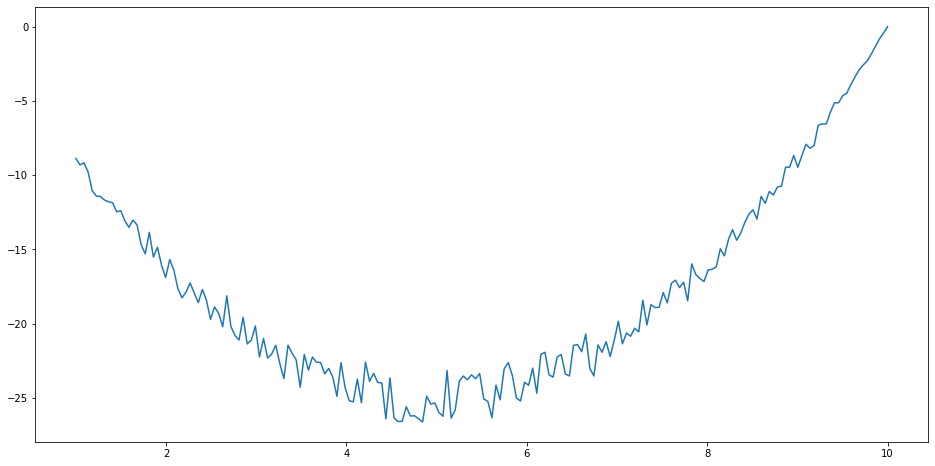

In [12]:
# Leitura do arquivo "teste3"
arch_03 = np.load("Bases_ATP/teste3.npy")

# Salvamento das variáveis
x_03 = arch_03[0]
y_03 = arch_03[1]

# Exibição do comportamento das variáveis
plt.figure(figsize=(16,8))
plt.plot(x_03,y_03)
plt.show()

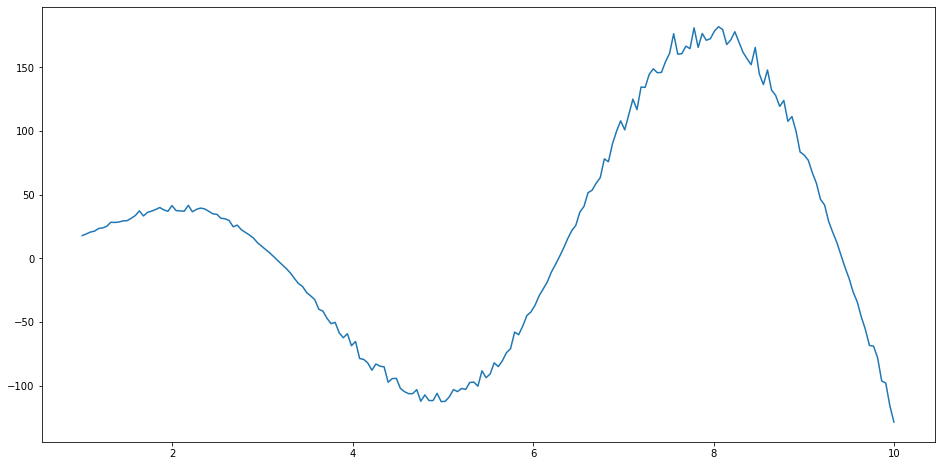

In [13]:
# Leitura do arquivo "teste4"
arch_04 = np.load("Bases_ATP/teste4.npy")

# Salvamento das variáveis
x_04 = arch_04[0]
y_04 = arch_04[1]

# Exibição do comportamento das variáveis
plt.figure(figsize=(16,8))
plt.plot(x_04,y_04)
plt.show()

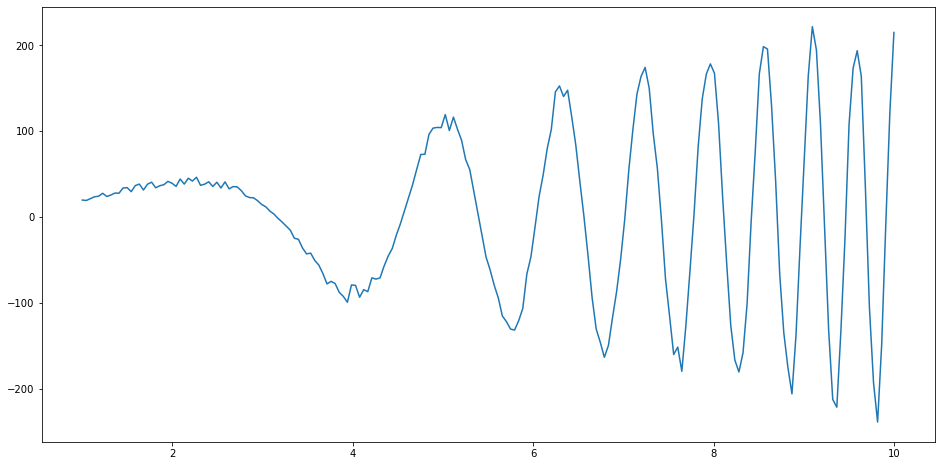

In [14]:
# Leitura do arquivo "teste5"
arch_05 = np.load("Bases_ATP/teste5.npy")

# Salvamento das variáveis
x_05 = arch_05[0]
y_05 = arch_05[1]

# Exibição do comportamento das variáveis
plt.figure(figsize=(16,8))
plt.plot(x_05,y_05)
plt.show()

## Fase de testes

Para cada um dos testes será aplicada uma lista com pelo menos 3 distribuições de camadas e neurônios a fim de serem realizados 10 treinos com cada uma.

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Média: 0.06025706941775951, Desvio Padrão: 0.0005494958366899574 para o teste 2 e layers (8, 16, 8)
Média: 0.05881605686037951, Desvio Padrão: 0.0011596784880380045 para o teste 2 e layers (16, 32, 16)
Média: 0.058285409461859713, Desvio Padrão: 0.0009803799210964484 para o teste 2 e layers (32, 64, 32)
Demonstração do melhor caso: (32, 64, 32)


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


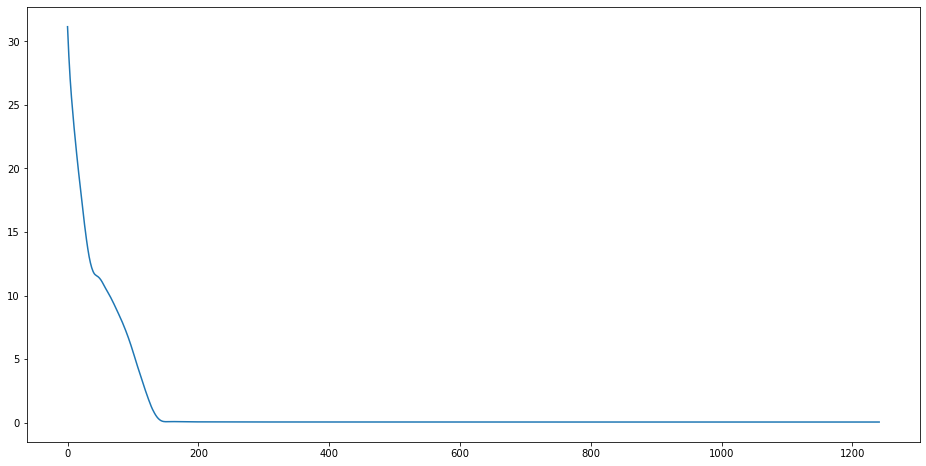

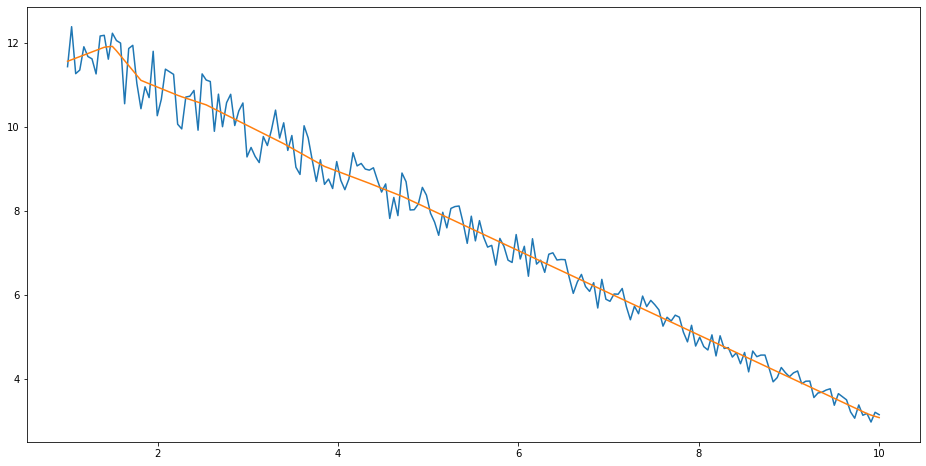

In [16]:
#Lista para testes de hidden layer
dict_hidden_layer = [
  (8,16,8),
  (16,32,16),
  (32,64,32)        
]

model = MLPModel(dict_hidden_layer[2],10000, "relu")

model_01_regr = model.fit(x_02,y_02)

#Valores para o teste2
values = calcLoss(x_02, y_02, dict_hidden_layer)

mean, stdDev = [], []

min_loss = float("inf")

for i in range(len(values)):
  mean.append(np.mean(values[i]))
  stdDev.append(np.std(values[i]))
  if mean[i] < min_loss:
    min_loss = mean[i]
    best_layer = dict_hidden_layer[i]
  print("Média: {}, Desvio Padrão: {} para o teste 2 e layers {}".format(mean[i], stdDev[i], dict_hidden_layer[i]))

#Demonstração para o melhor caso
print("Demonstração do melhor caso: {}".format(best_layer))
model = MLPModel(best_layer , 10000, "relu")
model_01_regr = model.fit(x_02,y_02)

# Exibição da curva de aprendizado
plt.figure(figsize=(16,8))
plt.plot(model_01_regr.loss_curve_)
plt.show()

y_pred = model_01_regr.predict(x_02)

plt.figure(figsize=(16,8))
plt.plot(x_02,y_02,x_02,y_pred)
plt.show()

In [ ]:
#Lista para testes de hidden layer do teste3
dict_hidden_layer_03 = [
  (45,30,15),
  (16,32,32,16),
  (20,30,20)                  
]

#Valores para o teste3
values = calcLoss(x_03, y_03, dict_hidden_layer_03)

min_loss = float("inf")

mean, stdDev = [], []

for i in range(len(values)):
  mean.append(np.mean(values[i]))
  stdDev.append(np.std(values[i]))
  if mean[i] < min_loss:
    min_loss = mean[i]
    best_layer = dict_hidden_layer_03[i]
  print("Média: {}, Desvio Padrão: {} para o teste 3 e layers {}".format(mean[i], stdDev[i], dict_hidden_layer_03[i]))

#Demonstração para o melhor caso
print("Demonstração do melhor caso: {}".format(best_layer))
model_02 = MLPModel(best_layer , 10000, "relu")
model_02_regr = model_02.fit(x_03,y_03)

# Exibição da curva de aprendizado
plt.figure(figsize=(16,8))
plt.plot(model_02_regr.loss_curve_)
plt.show()

y_pred = model_02_regr.predict(x_03)

plt.figure(figsize=(16,8))
plt.plot(x_03,y_03,x_03,y_pred)
plt.show()

In [ ]:
#Lista para testes de hidden layer do teste 4
dict_hidden_layer_04 = [        
  (15,50,100),
  (25, 60, 120),
  (10, 45, 100)
]

min_loss = float("inf")

#Valores para o teste 4
values = calcLoss(x_04, y_04, dict_hidden_layer_04)
print(values)

mean, stdDev = [], []

for i in range(len(values)):
  mean.append(np.mean(values[i]))
  stdDev.append(np.std(values[i]))
  if mean[i] < min_loss:
    min_loss = mean[i]
    best_layer = dict_hidden_layer_04[i]
  print("Média: {}, Desvio Padrão: {} para o teste 4 e layers {}".format(mean[i], stdDev[i], dict_hidden_layer_04[i]))


#Demonstração para o melhor caso
print("Demonstração do melhor caso: {}".format(best_layer))
model_03 = MLPModel(best_layer, 10000, "relu")
model_03_regr = model_03.fit(x_04,y_04)

# Exibição da curva de aprendizado
plt.figure(figsize=(16,8))
plt.plot(model_03_regr.loss_curve_)
plt.show()

y_pred = model_03_regr.predict(x_04)

plt.figure(figsize=(16,8))
plt.plot(x_04,y_04,x_04,y_pred)
plt.show()

In [ ]:
#Lista para testes de hidden layer do teste 5
dict_hidden_layer_05 = [        
    (150,150,150,150,150),
    (128,256,256,128),
    (150, 200, 200, 150),
    (300,300,300,300)
]

#Valores para o teste5
values = calcLoss(x_05, y_05, dict_hidden_layer_05)
print(values)

min_loss = float("inf")

mean, stdDev = [], []

for i in range(len(values)):
  mean.append(np.mean(values[i]))
  stdDev.append(np.std(values[i]))
  if mean[i] < min_loss:
    min_loss = mean[i]
    best_layer = dict_hidden_layer_05[i]
  print("Média: {}, Desvio Padrão: {} para o teste 5 e layers {}".format(mean[i], stdDev[i], dict_hidden_layer_05[i]))

#Demonstração para o melhor caso
print("Demonstração do melhor caso: {}".format(best_layer))
model_04 = MLPModel(best_layer, 20000, "relu")
model_04_regr = model_04.fit(x_05,y_05)

# Exibição da curva de aprendizado
plt.figure(figsize=(16,8))
plt.plot(model_04_regr.loss_curve_)
plt.show()

y_pred = model_04_regr.predict(x_05)

plt.figure(figsize=(16,8))
plt.plot(x_05,y_05,x_05,y_pred)
plt.show()